In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

file_path = "/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv"
data = pd.read_csv(file_path)

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

Побудуємо графіки розподілу, які показують різні моделі для різних значень AQI.

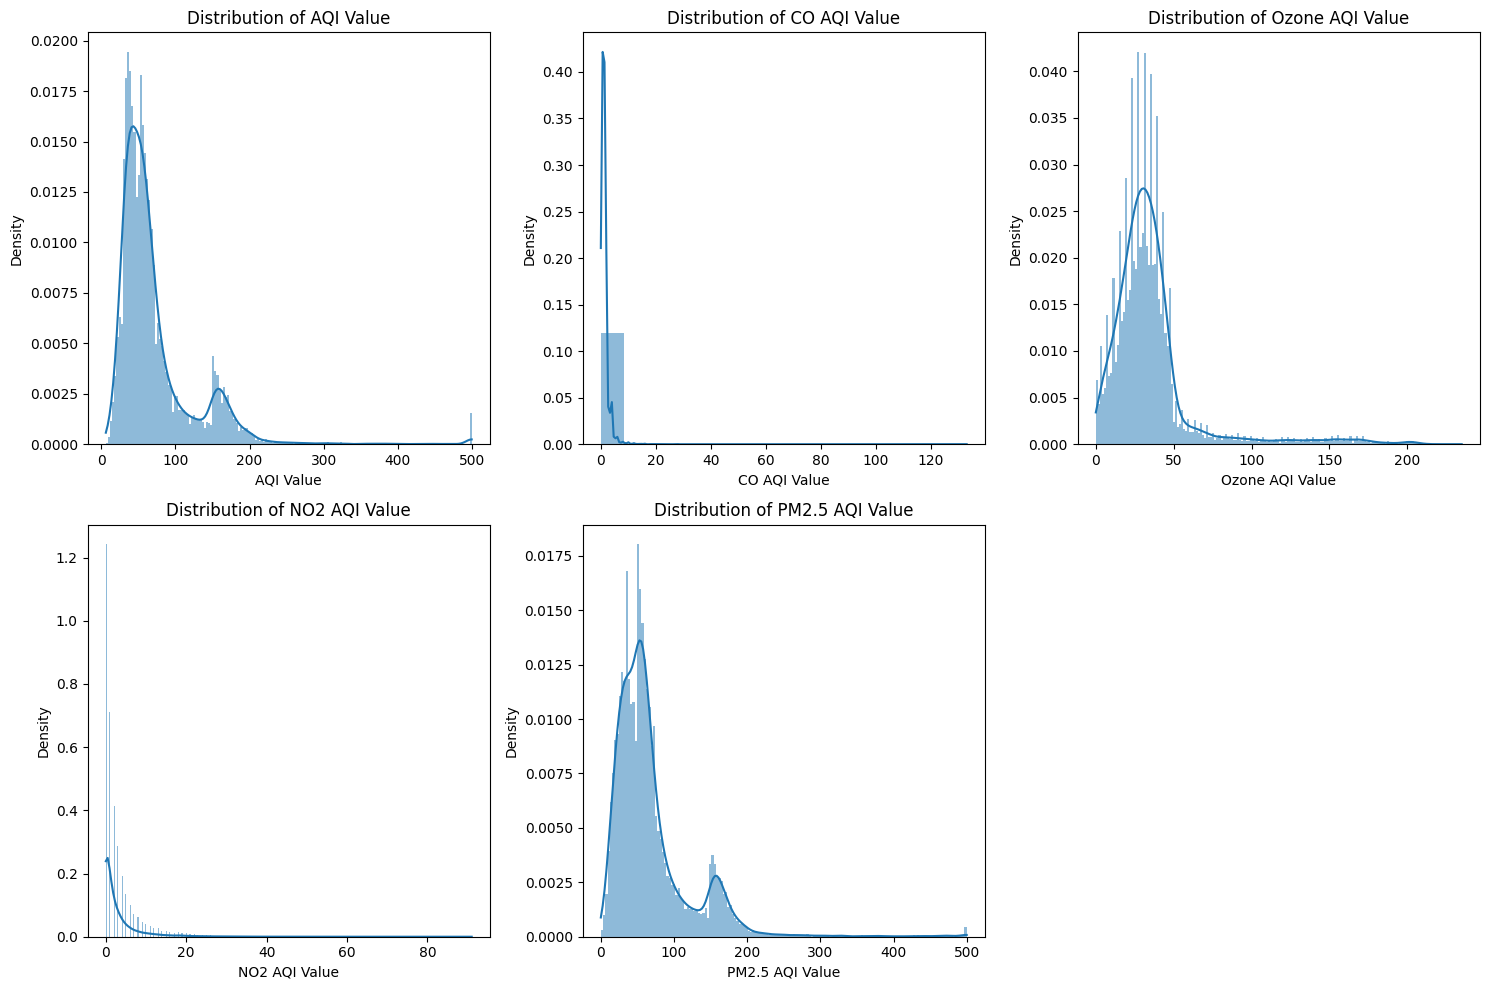

In [67]:
aqi_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    n_cols = 3
    n_rows = (len(aqi_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figsize as needed
    axes = axes.flatten()  # Flatten the array of axes

    for i, col in enumerate(aqi_columns):
        sns.histplot(data[col], kde=True, stat="density", linewidth=0, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')

    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

Бачимо, що, наприклад, `AQI PM2,5 Value` має тенденцію демонструвати викривлений розподіл, що вказує на часті випадки значної зміни значень, але іноді високих концентрацій, що є типовим для твердих часток. А ось `Ozone AQI Value`  показує більш рівномірний розподіл, що передбачає ширший діапазон концентрацій із меншою кількістю екстремальних значень.

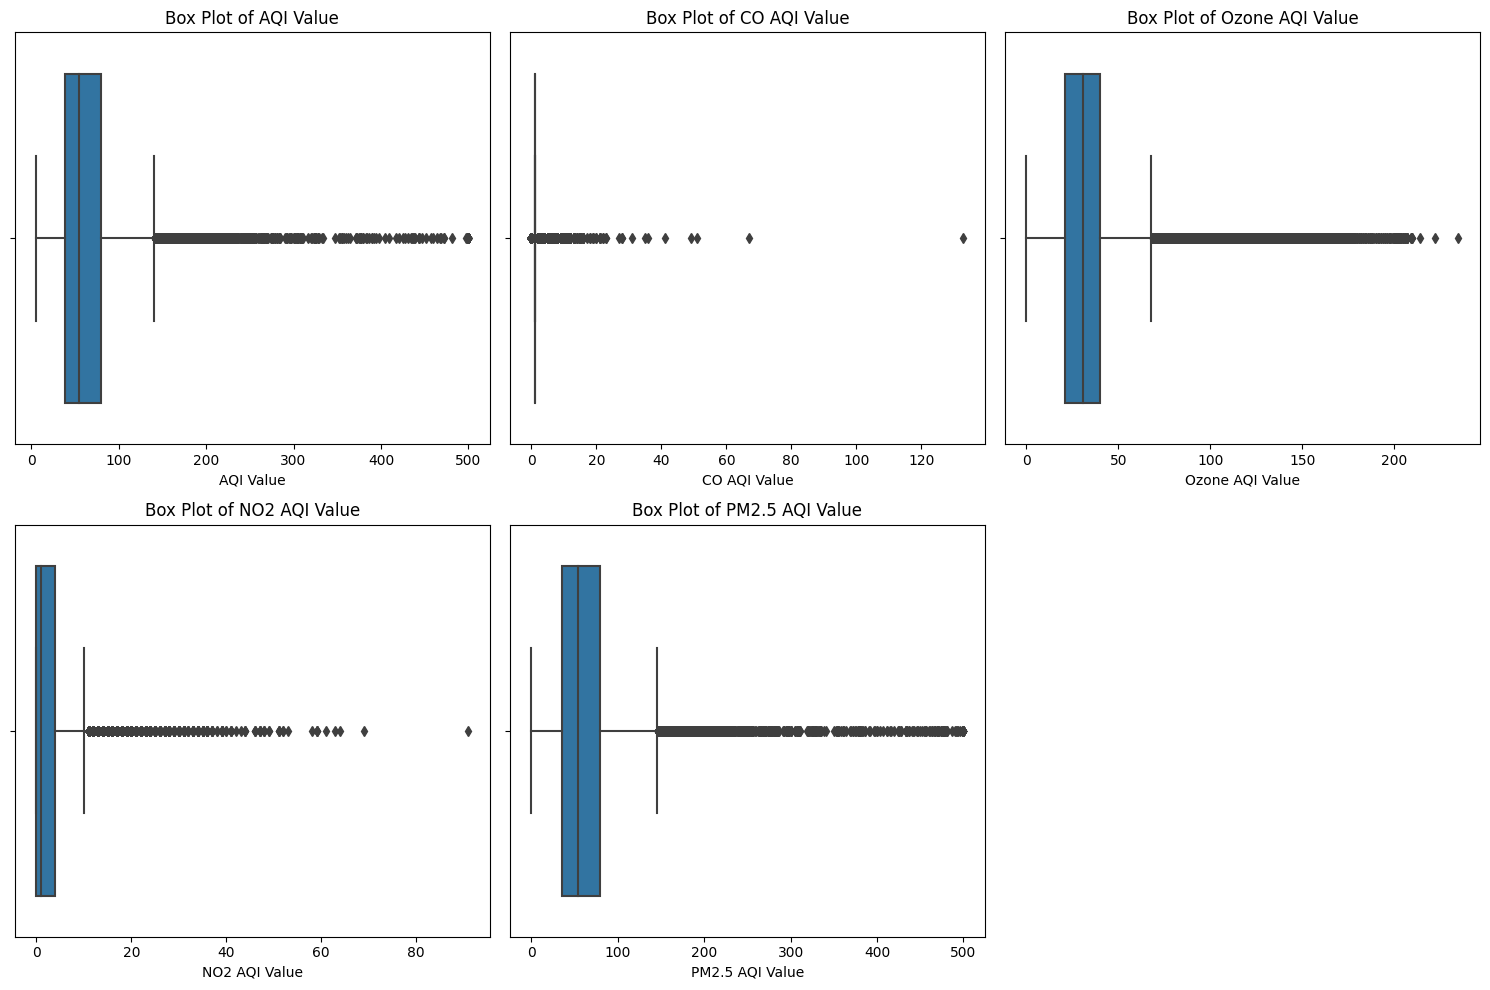

In [68]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    n_cols = 3
    n_rows = (len(aqi_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figsize as needed
    axes = axes.flatten()  # Flatten the array of axes

    for i, col in enumerate(aqi_columns):
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel(col)

    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

Бачимо, що медіана ділить дані переважно нерівномірно, за винятком озону з поділом на 50% вище та 50% нижче, це означає, що рівно половина точок даних більша за медіану, а інша половина менша за медіану. Також можемо побачити, що у набору даних наявні значні викиди.

Використаємо перетворення логарифму для зменшення асиметрії. Функція log1p використовується для обробки нульових значень шляхом обчислення натурального логарифма одиниці плюс значення. Підставлення даних до логарифмічного нормального розподілу та нанесення його на гістограму дозволить нам побачити, чи забезпечує воно кращу відповідність, ніж звичайний розподіл.

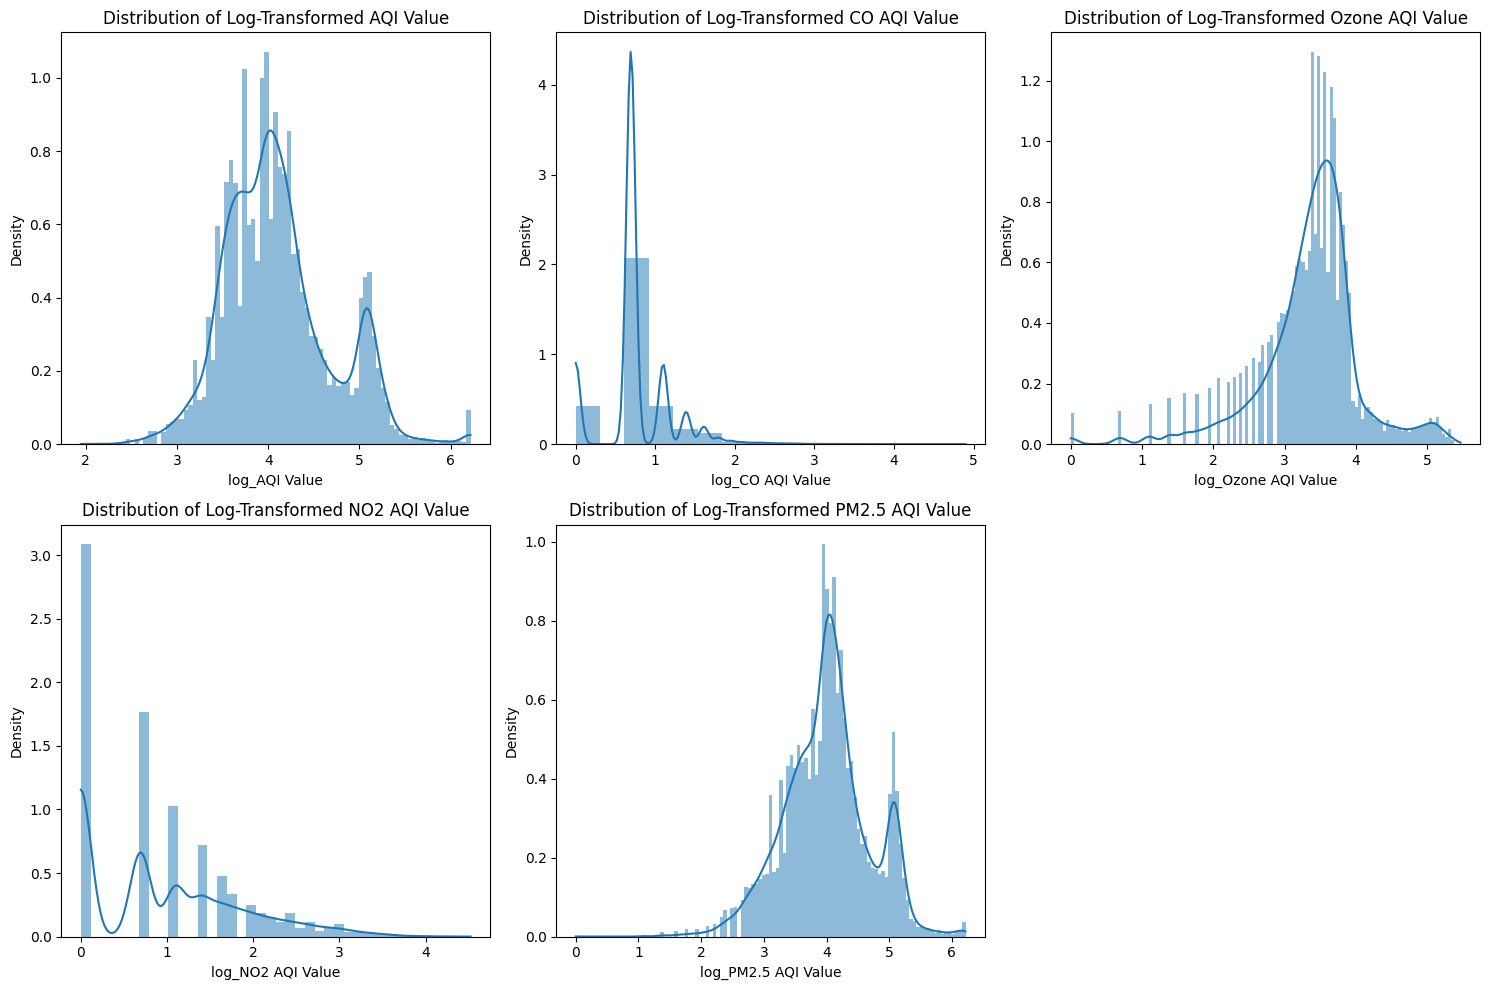

In [69]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    n_cols = 3
    n_rows = (len(aqi_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figsize as needed
    axes = axes.flatten()  # Flatten the array of axes

    for i, col in enumerate(aqi_columns):
        log_col = f'log_{col}'
        data[log_col] = np.log1p(data[col])  # Apply log transformation
        
        sns.histplot(data[log_col], kde=True, stat="density", linewidth=0, ax=axes[i])
        axes[i].set_title(f'Distribution of Log-Transformed {col}')
        axes[i].set_xlabel(log_col)
        axes[i].set_ylabel('Density')

    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


Також використаємо графіки Q-Q, які дозволять порівняти квантилі даних із теоретичним нормальним розподілом, що допоможе візуалізувати відхилення від норми. Використаємо графіки Q-Q для логарифмічних перетворених даних, які покажуть, чи покращує застосування логарифмічного перетворення припущення нормальності. Судячи з результатів підставлення даних ближче до діагональної лінії свідчить про те, що логарифмічний розподіл даних ближче до нормального.

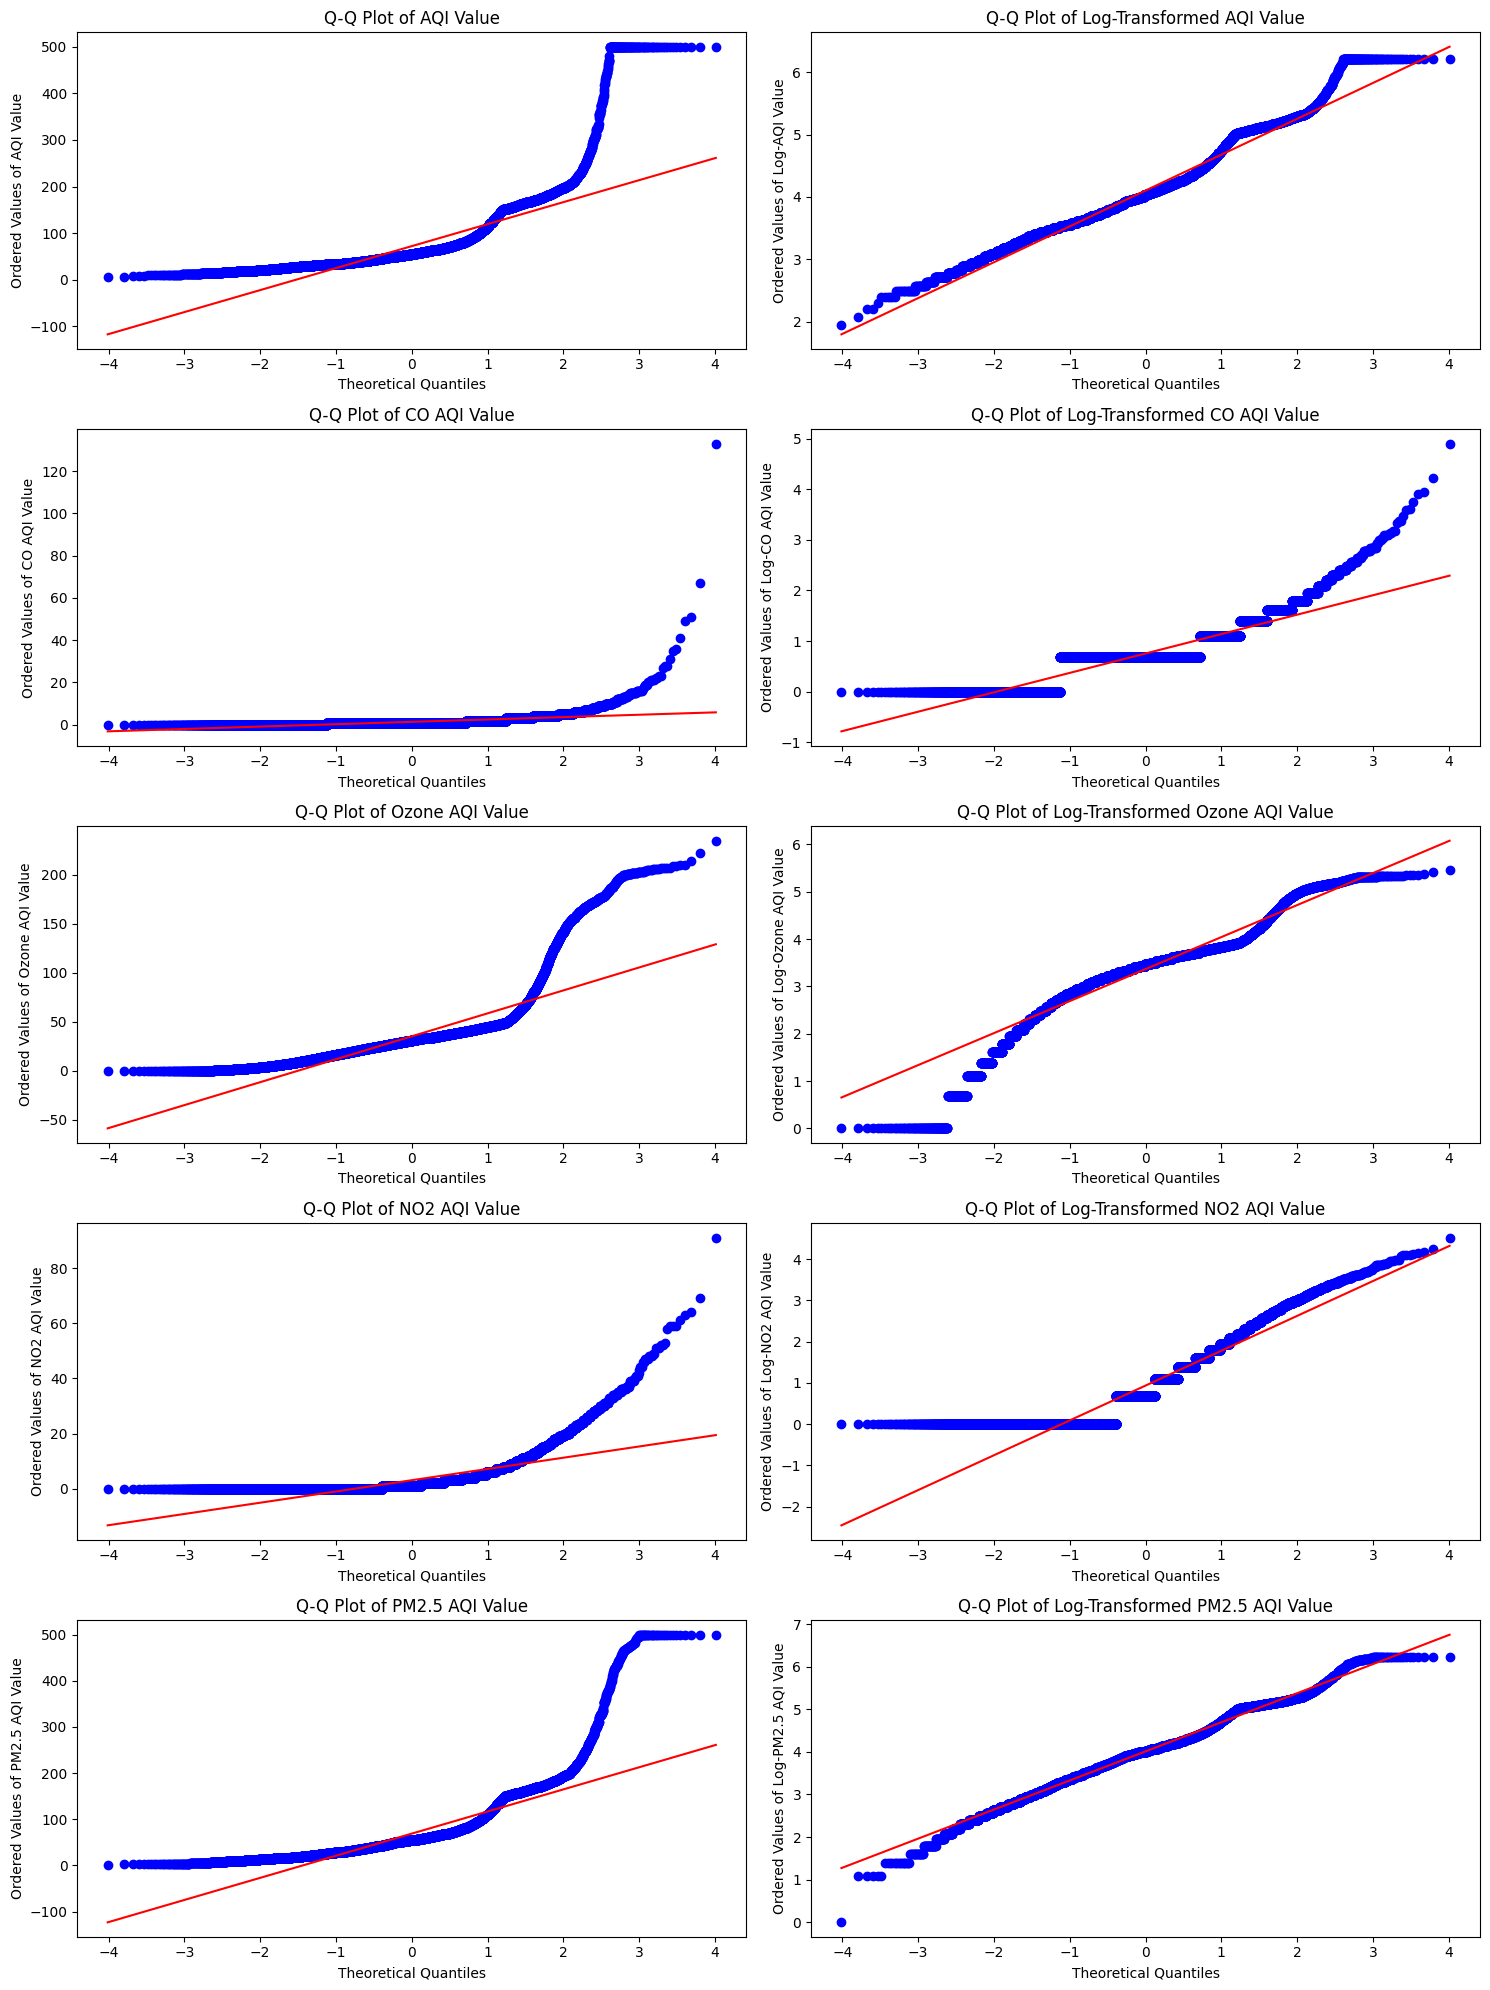

In [70]:
n_cols = 2
n_rows = len(aqi_columns)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))  # Adjust figsize as needed

for i, col in enumerate(aqi_columns):
    stats.probplot(data[col], dist="norm", plot=axes[i, 0])
    axes[i, 0].set_title(f'Q-Q Plot of {col}')
    axes[i, 0].set_xlabel('Theoretical Quantiles')
    axes[i, 0].set_ylabel(f'Ordered Values of {col}')
    
    log_col = f'log_{col}'
    data[log_col] = np.log1p(data[col])  # Apply log transformation
    stats.probplot(data[log_col], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of Log-Transformed {col}')
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel(f'Ordered Values of Log-{col}')

plt.tight_layout()
plt.show()